In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [89]:
df_ads= pd.read_csv('advertising.csv', encoding='unicode_escape')
print(df_ads.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [90]:
print(df_ads.shape)

(200, 4)


In [91]:
print(df_ads.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [92]:
print(df_ads.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [93]:
sum_nl=df_ads.isnull()
print(sum_nl.sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


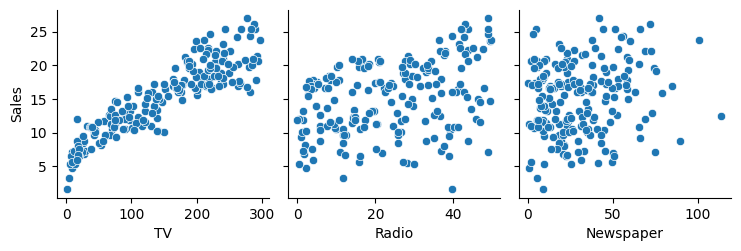

In [94]:
sns.pairplot(df_ads, y_vars=['Sales'], x_vars=['TV','Radio','Newspaper'], kind='scatter')
plt.show()

<Axes: xlabel='TV', ylabel='Frequency'>

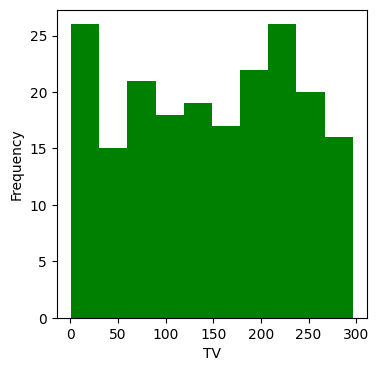

In [116]:
plt.figure(figsize=(4,4))
df_ads['TV'].plot.hist(bins=10, xlabel= 'TV', color= 'Green')

<Axes: xlabel='Radio', ylabel='Frequency'>

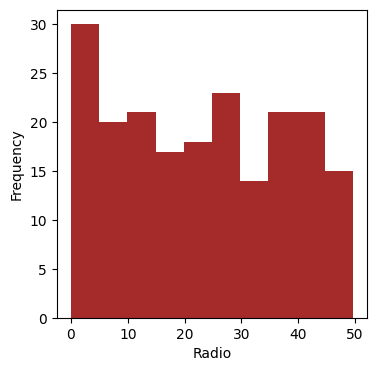

In [122]:
plt.figure(figsize=(4,4))
df_ads['Radio'].plot.hist(bins=10, xlabel= 'Radio', color= 'brown')

<Axes: xlabel='Newspaper', ylabel='Frequency'>

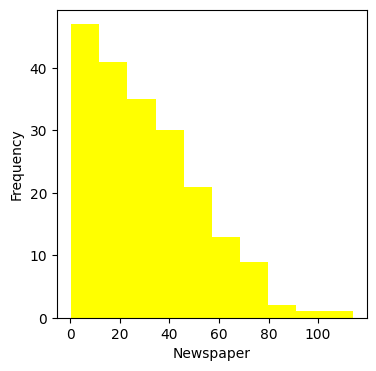

In [123]:
plt.figure(figsize=(4,4))
df_ads['Newspaper'].plot.hist(bins=10, xlabel= 'Newspaper', color= 'yellow')

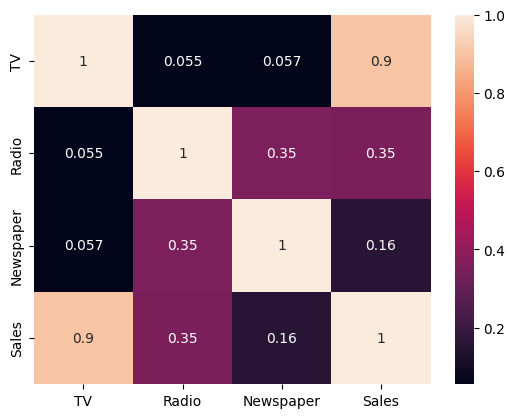

In [95]:
sns.heatmap(df_ads.corr(), annot= True)
plt.show()

In [100]:
features= ['Newspaper','TV','Radio']
X= df_ads[features]
Y= df_ads['Sales']

X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=42)
print(f"Training data shape:{X_train.shape}")
print(f"Testing data shape:{X_test.shape}")
print(f"Training data target shape:{Y_train.shape}")
print(f"Testing data target shape:{Y_test.shape}")

Training data shape:(160, 3)
Testing data shape:(40, 3)
Training data target shape:(160,)
Testing data target shape:(40,)


In [101]:
model= LinearRegression()
model.fit(X_train, Y_train)
y_pred= model.predict(X_test)

In [102]:
sqr= mean_squared_error(Y_test,y_pred)
mae= mean_absolute_error(Y_test,y_pred)
r2= r2_score(Y_test, y_pred)

print(f"Mean squared Error: {sqr}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean squared Error: 2.9077569102710927
Mean Absolute Error: 1.2748262109549349
R-squared: 0.9059011844150825


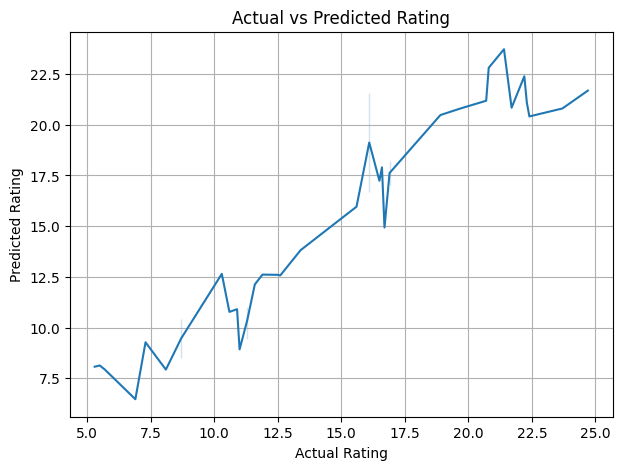

In [103]:
plt.figure(figsize=(7,5))
sns.lineplot(x= Y_test, y= y_pred)
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual vs Predicted Rating")
plt.grid(True)
plt.show()


This conclude that the sales increases when investment in TV advertisement increases.